In [1]:
%matplotlib inline
from fastai.basics import *

### Linear Regression Model 

In [2]:
n=100

In [3]:
x=torch.ones(n,2)
x[:,0].uniform_(-1.,1) #is replaced by uniform random number
x[:5] #the first five rows

tensor([[-0.7865,  1.0000],
        [-0.9207,  1.0000],
        [ 0.7958,  1.0000],
        [ 0.9143,  1.0000],
        [ 0.2799,  1.0000]])

In [4]:
a=tensor(3.,2);a 
#slope,intersetcion
#tensor means array of a regular shape; rank means dimensions (a RGB image is 3-rank tensor)

tensor([3., 2.])

In [5]:
y=x@a+torch.rand(n) #x@a---> matrix product

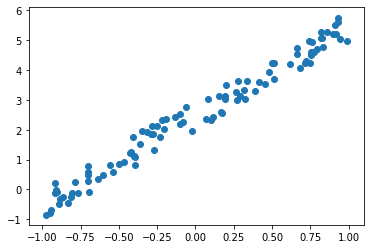

In [6]:
plt.scatter(x[:,0],y)

You want to find parameters (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [7]:
def mse(y_hat,y):
    return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our prediction and then compute our error.

In [8]:
a = tensor(-1.0,1.0)

In [9]:
y_hat=x@a
mse(y_hat,y)

tensor(8.1459)

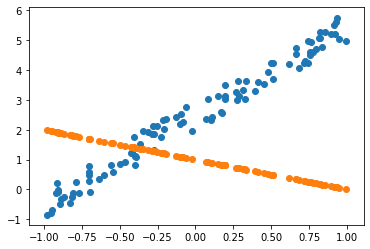

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for a? How do we find the best fitting linear regression.

### Gradient Descent 

We would like to find the values of a that minimize mse_loss.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in PyTorch.

In [11]:
a=nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [12]:
def update():
    y_hat=x@a
    loss=mse(y,y_hat)
    if t%10==0:
        print (loss)
    loss.backward() #calculate the derivative and is stuck in a field called "grad"--> a-grad
    with torch.no_grad():
        a.sub_(lr*a.grad) #sub_=>a-=...#a subtracted by the gradient, lr--> learning rate
        a.grad.zero_()

In [13]:
lr=1e-1
for t in range(100):
    update()

tensor(8.1459, grad_fn=<MeanBackward0>)
tensor(1.3862, grad_fn=<MeanBackward0>)
tensor(0.3640, grad_fn=<MeanBackward0>)
tensor(0.1477, grad_fn=<MeanBackward0>)
tensor(0.1009, grad_fn=<MeanBackward0>)
tensor(0.0908, grad_fn=<MeanBackward0>)
tensor(0.0886, grad_fn=<MeanBackward0>)
tensor(0.0881, grad_fn=<MeanBackward0>)
tensor(0.0880, grad_fn=<MeanBackward0>)
tensor(0.0880, grad_fn=<MeanBackward0>)


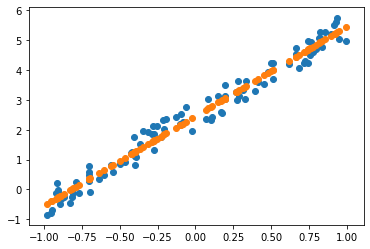

In [15]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

### Animate it!

In [16]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [17]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use mini-batches. bs = 128 images from de dataset are passed through the network on a time, calculate a loss and update the weights:

In [18]:
#def update():
#    y_hat=x@a
#    loss=mse(y(rand_idx),y_hat(rand_idx))
#    if t%10==0:
#        print (loss)
#    loss.backward() #calculate the derivative and is stuck in a field called "grad"--> a-grad
#    with torch.no_grad():
#        a.sub_(lr*a.grad) #a subtracted by the gradient, lr--> learning rate
#        a.grad.zero_()